## Section 1
- Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  
- Like any other business, banking is also a business aiming to generate revenue and in turn profits. Credit card business is one of the business lines of the bank where the bank offers a line of credit to the customer on the basis of the credit worthiness of the customer. The assessment of credit worthiness may involve evaluation of exhaustive list of parameters/features which may be qualitative and quantitative in nature. Processing of such enormous data for millions of customers manually is cumbersome and will be subjected to human errors. Eventually not completing the task in timely and correct manner will result in loss of business. Automating this process by use of ML approach will be cost-effective and efficient enabling bank to provide services to customers instantly or may be even on a pre-approved basis with higher accuracy. Secondly, by predicting a good-client the bank will be able to serve customer's need and reduce churn while generating profits and by avoiding probable defaulters bank will be able to prevent frauds, default losses and recovery and procedural (operational & legal) expenses.    

- How is it going to impact the banking sector?
- With more and more population coming into ambit of banking and greater demand for banking services, the workload as well as data is growing multi-folds. Now it has become very difficult to process these data manually and cater to all customer needs at one go. Hence, by automating this task, banks will be able to predict good customers and dispose applications efficiently - quickly and with minimum chances of error resulting in generating more business, profits and enhancing customer satisfaction. Moreover, the Bank will be able to distinguish between good and a bad client thereby reducing chances of losses and improve business profits.

- If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
- As is evident, data are both internal and external. The business has internal data readily available at disposal and with increasing vendors and agencies coming to market, external data sharing has also become available. In any study being conducted, a researcher always limits the topics or features being studied due to unavailability of data or the costs involved in collection and processing of data. With available resources and knowledge/computational availablity the features impacting the target are studied and a suitable model is developed. But with changes in regulations and further improvements in technology, a researcher may have at his/her disposal new data or higher capability to process further data which may be assimilated in the existing model to improve accuracy or derive new patterns to predict a good customer and thereby increasing profits and preventing losses. Considering the current dataset, we feel that other features that might be useful in classification could be
1. Credit Bureau Score
2. Account Balance
3. Details other credit card or other loan products availed.
4. Total Networth
5. Tax returns
6. Total credit and debit turnover in operative accounts.
7. Other souces of income

## Section 2
- The dataset provided had all the independent variable in a csv file and the target labels stating application approved: 0, rejected: 1 in other csv file.
- The researcher has used vlookup function and incorporated labels in the same sheet as independent varibales.
- The necessary libraries were loaded to read the dataset and for visualisations and the dataset was loaded to notebook for further analysis.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('credit_card_mod.csv')
df.head() # head() function used to check if dataset is loaded properly.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.info() # The info() shows that we have a total of 19 columns and 1548 records in our dataset.
# The datatypes are checked and found to be correct - int/float for numerical and object for categorical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df.shape # shape function also gives the same info as above.

(1548, 19)

In [ ]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


The columns Annual Income and Birthday count seems to slightly right skewed and column Employed days is highly skewed since mean values are greater than their medians.

In [ ]:
df.isnull().sum() # we can see presence of missing values in certain columns.

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df['Annual_income'] = df['Annual_income'].fillna(df['Annual_income'].median()) # Since the columns have skewness, for preliminary analysis we will impute missing values with median.
df['Birthday_count'] = df['Birthday_count'].fillna(df['Birthday_count'].median())
df['GENDER'] = df['GENDER'].fillna("F") # Since its a categorical variable, the missing values will be filled with mode, i.e., "F".

### Exploratory Data Analysis

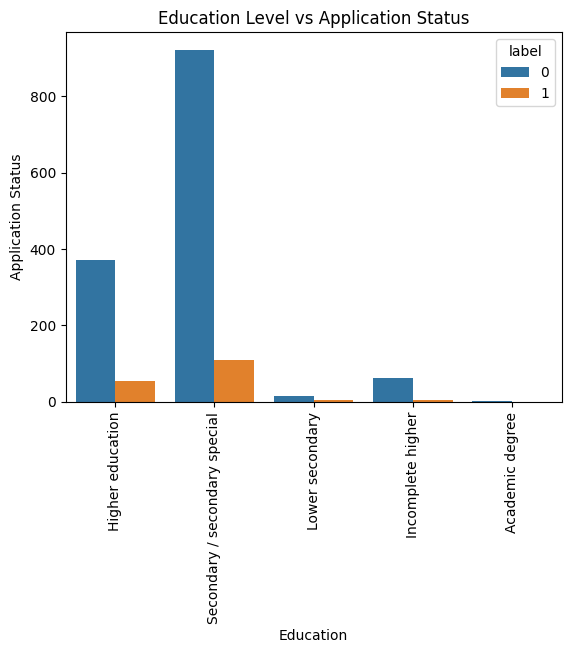

In [ ]:
sns.countplot(x = 'EDUCATION', hue = 'label', data = df)
plt.title('Education Level vs Application Status')
plt.xlabel('Education')
plt.ylabel('Application Status')
plt.xticks(rotation=90)
plt.show()

We see that individuals with Secondary and Higher Education are more inclined to avail credit cards and their acceptance ratio is also good. Hence, such population should be targeted.

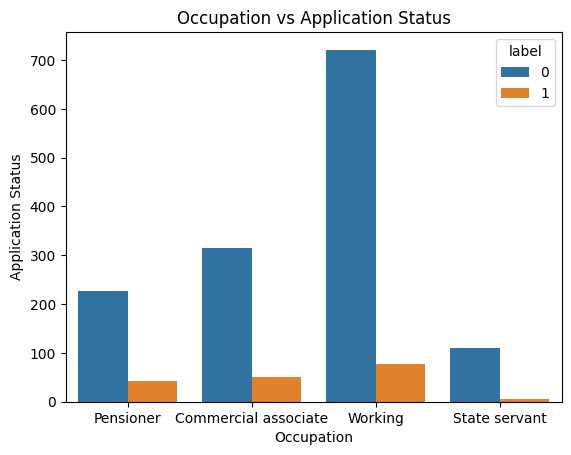

In [ ]:
sns.countplot(x = 'Type_Income', hue = 'label', data = df)
plt.title('Occupation vs Application Status')
plt.xlabel('Occupation')
plt.ylabel('Application Status')
plt.show()

We can see that people who are coming under working category are having maximum acceptance as compared to other categories. State servants have the least applications as well as rejections for the business. Business should focus on the "working class" for growth opportunities as their acceptance as well as applications are way more than other categories whereas rejections are in tune with others.

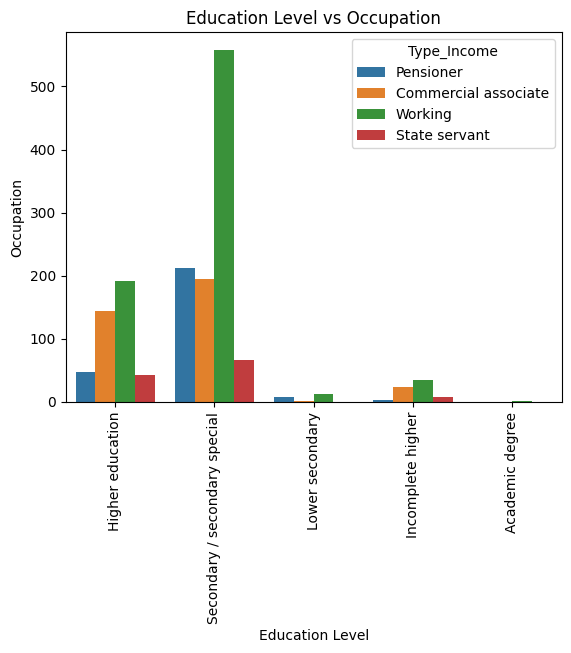

In [ ]:
sns.countplot(x = 'EDUCATION', hue = 'Type_Income', data = df)
plt.title('Education Level vs Occupation')
plt.xlabel('Education Level')
plt.ylabel('Occupation')
plt.xticks(rotation=90)
plt.show()

From the above analysis we see that our target population are the ones that have secondary and higher elementary education and are working in commercial jobs.

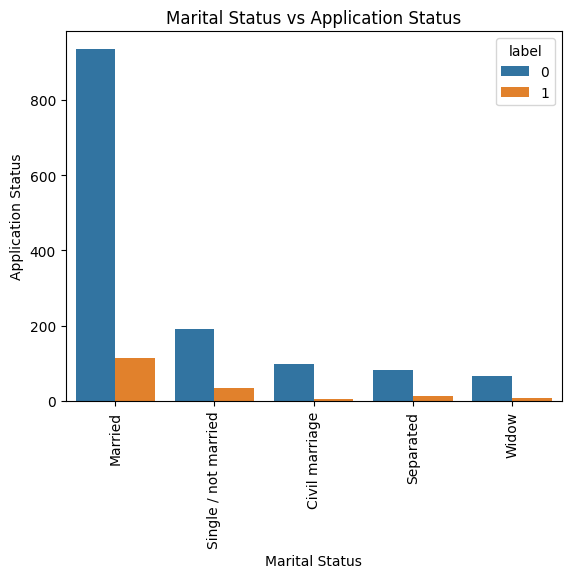

In [ ]:
sns.countplot(x = 'Marital_status', hue = 'label', data = df)
plt.title('Marital Status vs Application Status')
plt.xlabel('Marital Status')
plt.ylabel('Application Status')
plt.xticks(rotation = 90)
plt.show()

Married individuals have a higher probability of getting their applications accepted.

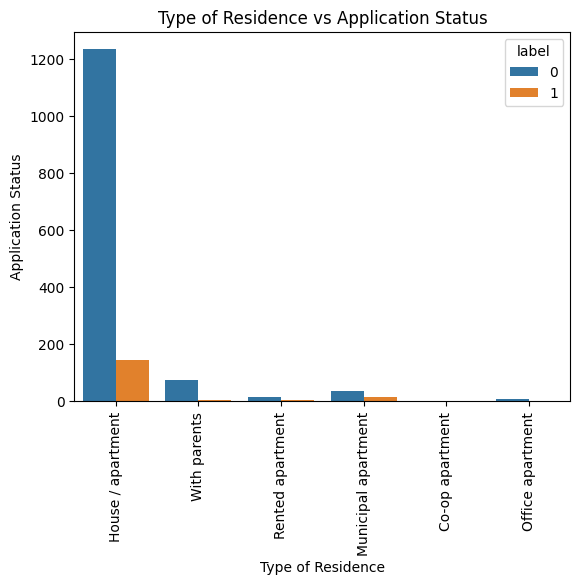

In [ ]:
sns.countplot(x = 'Housing_type', hue = 'label', data = df)
plt.title('Type of Residence vs Application Status')
plt.xlabel('Type of Residence')
plt.ylabel('Application Status')
plt.xticks(rotation = 90)
plt.show()

Individuals who live in house/apartments are more worthy applicants for the business.

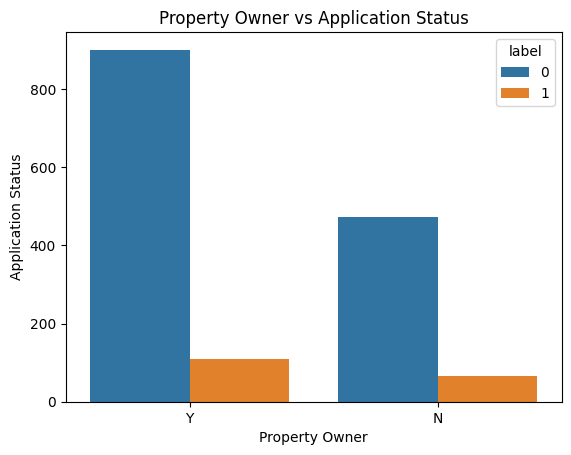

In [ ]:
sns.countplot(x = 'Propert_Owner', hue = 'label', data = df)
plt.title('Property Owner vs Application Status')
plt.xlabel('Property Owner')
plt.ylabel('Application Status')
plt.show()

Its evident and logical that individuals who own property are more likely to get their applications accepted.

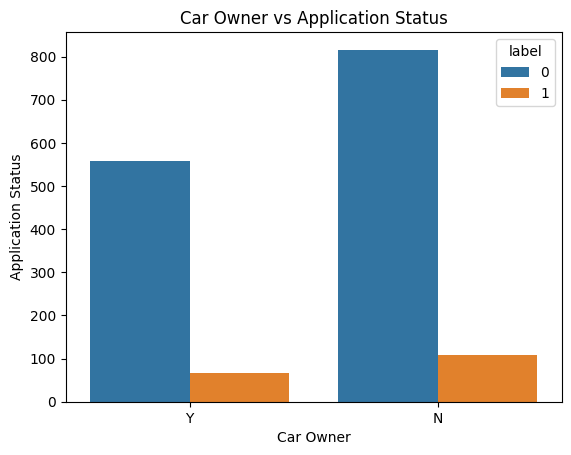

In [ ]:
sns.countplot(x = 'Car_Owner', hue = 'label', data = df)
plt.title('Car Owner vs Application Status')
plt.xlabel('Car Owner')
plt.ylabel('Application Status')
plt.show()

Its comes to our surprise that individuals who don't own a car are marginally more who got their applications accepted.

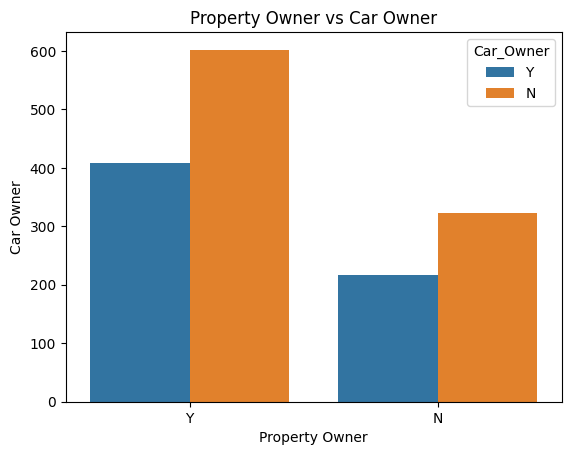

In [ ]:
sns.countplot(x = 'Propert_Owner', hue = 'Car_Owner', data = df)
plt.title('Property Owner vs Car Owner')
plt.xlabel('Property Owner')
plt.ylabel('Car Owner')
plt.show()

In our population of study, most of the property owners do not own cars.

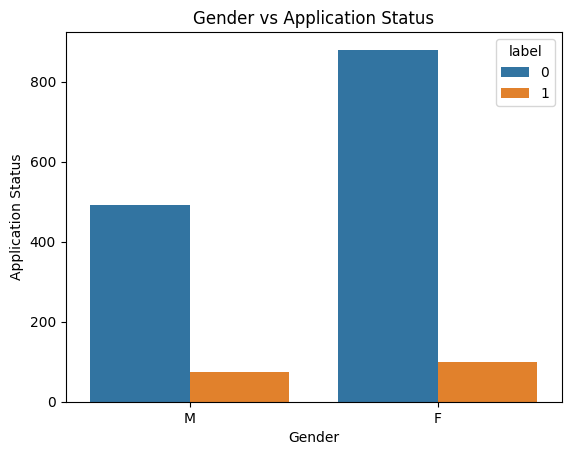

In [ ]:
sns.countplot(x = 'GENDER', hue = 'label', data = df)
plt.title('Gender vs Application Status')
plt.xlabel('Gender')
plt.ylabel('Application Status')
plt.show()

Female clients are seen to have greater chances of getting applications approved.

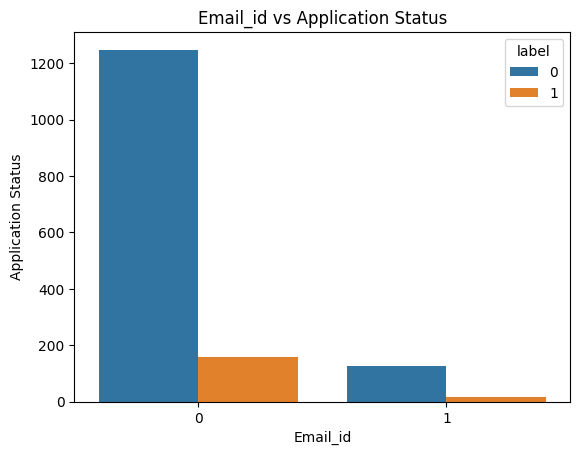

In [ ]:
sns.countplot(x = 'EMAIL_ID', hue = 'label', data = df)
plt.title('Email_id vs Application Status')
plt.xlabel('Email_id')
plt.ylabel('Application Status')
plt.show()

Clients who do not have Email IDs have got their applications approved in greater numbers in past.

In [ ]:
df['Birthday_count'] = round(abs(df['Birthday_count']/365),1) # Both columns Birthday count and Employed days had count of days for the timeframe. Hence, we had divided the count
                                                              # of days by 365 to convert the same to years and taken absolute values.
df['Employed_days'] = round(abs(df['Employed_days']/365),1)
df['Employed_days'].replace(1000.7, 0, inplace= True) # Since, majority of pensioners had count of employed days as 365243 which turns out to be more than 1000 yrs which cannot be true.
                                                      # Hence, considering it as improper data we have replaced the values with 0 as they are retired and pensioners.

In [ ]:
import plotly.express as px
fig = px.scatter(df, x="Birthday_count", y="Annual_income", title = 'Annual Income vs Age(in yrs.)')
fig.update_layout(width=1000, height=500)
fig.show()

In [ ]:
fig = px.scatter(df, x="Employed_days", y="Annual_income", title = 'Annual Income vs Period of Employment (in yrs.)')
fig.update_layout(xaxis_title = 'Period of Employment (in yrs.)')
fig.update_layout(width=1000, height=500)
fig.show()

From the above both scatter plots, we can infer that both Age as well as Period of employment are not impacting quantum of income. Hence, we cannot derive any linear relationship between these variables.

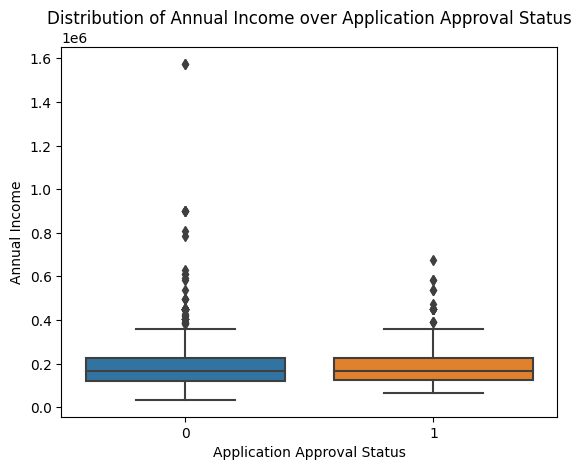

In [ ]:
sns.boxplot(x = 'label', y = 'Annual_income', data = df)
plt.title('Distribution of Annual Income over Application Approval Status')
plt.ylabel('Annual Income')
plt.xlabel('Application Approval Status')
plt.show()

The distribution of income for both categories seems to be same except that approved category shows presence of some extreme outliers on a higher side.

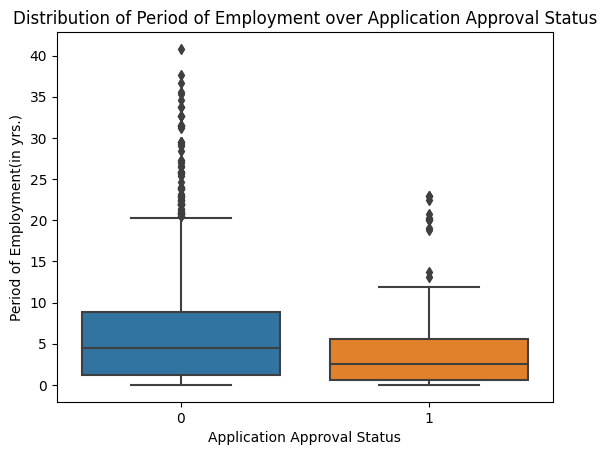

In [ ]:
sns.boxplot(x = 'label', y = 'Employed_days', data = df)
plt.title('Distribution of Period of Employment over Application Approval Status')
plt.xlabel('Application Approval Status')
plt.ylabel('Period of Employment(in yrs.)')
plt.show()

The individuals who have been employed for a longer period show more tendency of getting their applications approved.

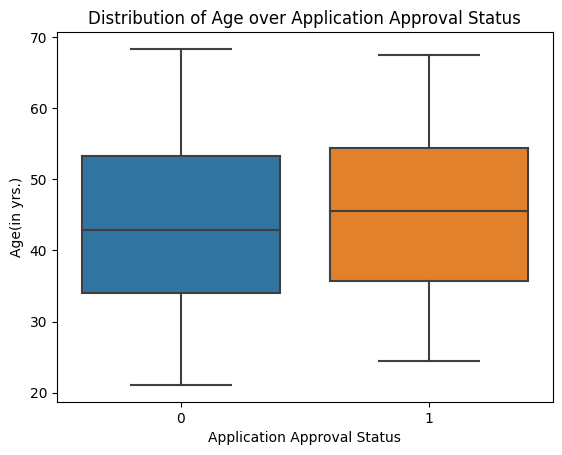

In [ ]:
sns.boxplot(x = 'label', y = 'Birthday_count', data = df)
plt.title('Distribution of Age over Application Approval Status')
plt.xlabel('Application Approval Status')
plt.ylabel('Age(in yrs.)')
plt.show()

No significant impact of age is seen in chances of application approval.

In [ ]:
df['Family_Members'] = np.where(df['Family_Members'] == 15, 5,df['Family_Members'])
df['CHILDREN'] = np.where(df['CHILDREN'] == 14, 4,df['CHILDREN'])

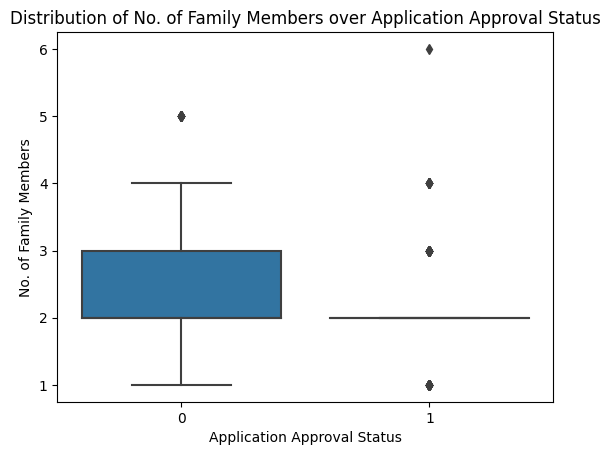

In [ ]:
sns.boxplot(x = 'label', y = 'Family_Members', data = df)
plt.title('Distribution of No. of Family Members over Application Approval Status')
plt.xlabel('Application Approval Status')
plt.ylabel('No. of Family Members')
plt.show()

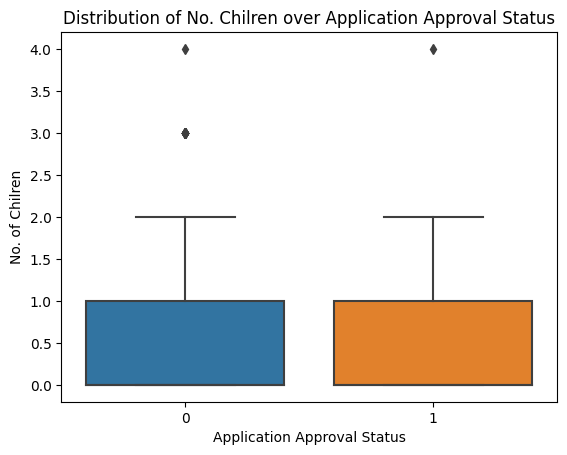

In [ ]:
sns.boxplot(x = 'label', y = 'CHILDREN', data = df)
plt.title('Distribution of No. Chilren over Application Approval Status')
plt.xlabel('Application Approval Status')
plt.ylabel('No. of Chilren')
plt.show()

The above 2 box plots if viewed along with barplot of marital status, it can be confered that a married individual residing in a family of 2-3 individuals have a greater propensity of getting application approved.

### Conclusion of EDA
- We can conclude that except age all the other variables have some sort of influence on the dependent variable - Application approval status.

## SQL Questions
- Since we have clean data at hand we may choose to answer the questions asked as part of the project.

In [ ]:
import duckdb
conn = duckdb.connect()
conn.register("df", df )

In [ ]:
conn.execute("select * from df").fetchdf() # data is fetched as we run the query.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.4,0.0,1,0,0,0,None,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.1,1.6,1,1,1,0,None,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42.9,1.6,1,1,1,0,None,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37.1,1.6,1,1,1,0,None,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.1,1.6,1,1,1,0,None,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32.8,6.0,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.3,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.1,6.8,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41.9,1.8,1,1,1,0,Drivers,2,0


1.	Group the customers based on their income type and find the average of their annual income.
- The individuals who are employed as Commercial Associate have highest average annual income among others.

In [ ]:
conn.execute("select Type_Income, round(avg(Annual_income),2) as Avg_Annual_Income from df group by 1 order by 2 desc ").fetchdf()

,Type_Income,Avg_Annual_Income
0,Commercial associate,233107.40
1,State servant,211422.41
2,Working,180848.21
3,Pensioner,155343.50


2.	Find the female owners of cars and property.
- A total of 179 female individuals who are owners of cars and property have been fetched.

In [ ]:
conn.execute("select Ind_ID, GENDER, Car_Owner, Propert_Owner from df where GENDER == 'F' and Car_Owner == 'Y' and Propert_Owner == 'Y' ").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner
0,5018498,F,Y,Y
1,5018501,F,Y,Y
2,5018503,F,Y,Y
3,5024213,F,Y,Y
4,5036660,F,Y,Y
...,...,...,...,...
174,5048458,F,Y,Y
175,5023719,F,Y,Y
176,5033520,F,Y,Y
177,5024049,F,Y,Y


3.	Find the male customers who are staying with their families.
- We have fetched records of 470 male individuals who are having more than 1 individuals in their family household, means they are residing in a family.

In [ ]:
conn.execute("select Ind_ID, GENDER, Family_Members from df where GENDER == 'M' and Family_Members > 1 ").fetchdf()

,Ind_ID,GENDER,Family_Members
0,5008827,M,2
1,5010864,M,3
2,5010868,M,3
3,5021303,M,3
4,5021310,M,2
...,...,...,...
465,5096856,M,2
466,5090942,M,2
467,5118268,M,3
468,5115992,M,4


4.	Please list the top five people having the highest income.
- the records of top five people having the highest income fetched as below.

In [ ]:
conn.execute("select Ind_ID, Annual_income from df order by 2 desc limit 5 ").fetchdf()

,Ind_ID,Annual_income
0,5143231,1575000.0
1,5143235,1575000.0
2,5090470,900000.0
3,5079016,900000.0
4,5079017,900000.0


5.	How many married people are having bad credit?
- We have a total of 118 individuals are married and have a bad credit record.

In [ ]:
conn.execute("select count(Ind_ID) as Total_married_with_bad_credit from df where (Marital_status == 'Married' or Marital_status == 'Civil marriage') and label == '1' ").fetchdf()

,Total_married_with_bad_credit
0,118


6.	What is the highest education level and what is the total count?
- Highest education level seen is Academic Degree and there are only 2 individuals who possess the qualification.

In [ ]:
conn.execute("select count(Ind_ID) as Tot_count, EDUCATION from df group by 2 ").fetchdf()

,Tot_count,EDUCATION
0,68,Incomplete higher
1,2,Academic degree
2,426,Higher education
3,1031,Secondary / secondary special
4,21,Lower secondary


7.	Between married males and females, who is having more bad credit?
- Between married males and females, females marginally have more bad credit as their count is 64 against 54 males.

In [ ]:
conn.execute("select count(Ind_ID) as Tot_count, GENDER from df where label == 1 and (Marital_status == 'Married' or Marital_status == 'Civil marriage') group by 2 order by 1 desc").fetchdf()

,Tot_count,GENDER
0,64,F
1,54,M


## Feature Engineering & Data Transformation

- We notice that feature 'Type_Occupation' has 488 missing values which comprise to nearly 30% of the data. We can get back to client and ask for these missing data or seek suggestions. Since, at the moment we do not have this priviledge and imputing such a large amount of dummy data would pollute the dataset and result in imperfections in our model predictions. Hence, we would prefer to drop the column.
- Column 'Ind_ID' is a unique client identifier and does not provide and quantifiable value for computation. Hence, we may drop this column.
- Columns 'Mobile_phone', 'Work_Phone' and 'Phone' provide details as per the client is contactable over phone or not. Hence, all the 3 columns provide same feature. Moreover, column 'Mobile_phone' has value 1 for all records which means all the clients have mobile phone. Since, the feature is common for all, it won't serve as a criteria for distinguishing one client from another. Hence, all 3 columns may be dropped.

In [ ]:
df.drop(['Type_Occupation', 'Ind_ID', 'Mobile_phone', 'Work_Phone', 'Phone' ], axis = 1, inplace = True)
df.head(2)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,EMAIL_ID,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.4,0.0,0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.1,1.6,0,2,1


- The column 'Marital_status' will be transformed to 2 classes 'Married' and 'Single' for simplicity since multi-class values present in the column essentially describe the above 2 classes only.
- The columns 'GENDER', 'Car_Owner', 'Propert_Owner', 'EMAIL_ID' and 'Marital_status' (post transformation) have binary values but are in string data type. Hence, to build a model over these features, we will assign dummy values for these columns and drop the first column since the binary value present in column will suffice to describe the record feature.

In [ ]:
df['Marital_status'] = df['Marital_status'].replace({'Civil marriage': 'Married',
                                                     'Single / not married': 'Single',
                                                     'Separated': 'Single',
                                                     'Widow':'Single'})

In [ ]:
df['Type_Income'] = df['Type_Income'].replace({'Commercial associate':'Working', # For our analysis we have classified population into working and pensioner class.
                                              'State servant':'Working'})

In [ ]:
edu_order = {'Lower secondary': 1,    # Similarly as obove, ordinal encoding is done for different education levels.
             'Secondary / secondary special': 2,
             'Incomplete higher': 3,
             'Higher education': 4,
             'Academic degree': 5}
df['EDUCATION'] = df['EDUCATION'].replace(edu_order)

In [ ]:
df['Housing_type'] = df['Housing_type'].replace({'Co-op apartment':3,     # 3 separate classes with ordinal classes have been created for owned, rented/official & residing with parents.
                                                 'House / apartment':3,
                                                 'Municipal apartment':3,
                                                 'Office apartment':2,
                                                 'Rented apartment':2,
                                                 'With parents': 1})

In [ ]:
df.rename(columns = {'CHILDREN':'Children',     # we rename columns for enhancing clarity
                   'EDUCATION':'Education_level',
                   'Birthday_count':'Age_yrs',
                   'Employed_days':'Employed_yrs',
                   'label':'Appln_status',
                   'GENDER_M':'Gender_M',
                   'EMAIL_ID_1':'Email_Y'}, inplace = True)

## Treatment of Outliers

In [ ]:
# Distribution of column annual income was checked using box plot and distribution plot and was found out that the column contains outliers on higher side making the variable right skewed.
# Hence, the outliers were capped using IQR method.
import plotly.express as px
fig = px.box(df, y="Annual_income", title = 'Distribution of Annual Income')
fig.update_layout(width=700, height=300)
fig.show()

In [ ]:
ai_q1 = df['Annual_income'].quantile(0.25) # Outliers have been capped using IQR method
ai_q3 = df['Annual_income'].quantile(0.75)
ai_iqr = ai_q3 - ai_q1
ai_uc = ai_q3 + (1.5*ai_iqr)

df['Annual_income'] = np.where(df['Annual_income'] > ai_uc, ai_uc, df['Annual_income'])

fig = px.box(df, y="Annual_income", title = 'Distribution of Annual Income after treatment of ouliers')
fig.update_layout(width=700, height=300)
fig.show()

In [ ]:
ey_q1 = df['Employed_yrs'].quantile(0.25)  # Similar treatment for column employed days was done.
ey_q3 = df['Employed_yrs'].quantile(0.75)
ey_iqr = ey_q3 - ey_q1
ey_uc = ey_q3 + (1.5*ey_iqr)

df['Employed_yrs'] = np.where(df['Employed_yrs'] > ey_uc, ey_uc, df['Employed_yrs'])

fig = px.box(df, y="Employed_yrs" , title = 'Distribution of Employment Duration after treatment of ouliers')
fig.update_layout(width=700, height=300)
fig.show()

Birthday count or Age column has not been treated for outliers since no extreme values were found and the data represent the actual age of the person which will be taken for analysis.

In [ ]:
fm_q1 = df['Family_Members'].quantile(0.25)  # treatment for outliers done for column family members.
fm_q3 = df['Family_Members'].quantile(0.75)
fm_iqr = fm_q3 - fm_q1
fm_uc = fm_q3 + (1.5*fm_iqr)

df['Family_Members'] = np.where(df['Family_Members'] > fm_uc, fm_uc, df['Family_Members'])
fig = px.box(df, y="Family_Members", title = 'Distribution of no. of family members')
fig.update_layout(width=700, height=300)
fig.show()

## Multicollinearity

In [ ]:
fig = px.imshow(df.corr(), title = 'Heatmap showing co-relation between variables')
fig.update_layout(width=1000, height=600)
fig.show()

The co-relation plot shows that there is a very high co-relation between no. of chilren and no. of family members. As is evident, family members is a derived column. Hence, we will drop the column children from our dataset in analysis for reducing multi-collinearity.
Similarly, we notice inverse relationship between working/pensioner column and age. It is obvious that people with high ages would have been retired/not working.
Similar inverse relationship is seen between marietal status and family members as family of married people will have a higher head count.
Both the above inverse relationships are more of a cause-effect relationship rather than multi-collinearity. Hence, these columns will be retained in analysis.

In [ ]:
df.drop(['Children'], axis = 1, inplace = True)
df.head(2)

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,Education_level,Marital_status,Housing_type,Age_yrs,Employed_yrs,EMAIL_ID,Family_Members,Appln_status
0,M,Y,Y,180000.0,Pensioner,4,Married,3,51.4,0.0,0,2.0,1
1,F,Y,N,315000.0,Working,4,Married,3,37.1,1.6,0,2.0,1


In [ ]:
# All the categorical variables have been one-hot encoded and first column for each have been dropped.
df_encoded = pd.get_dummies(df, columns= ['GENDER', 'Car_Owner', 'Propert_Owner', 'EMAIL_ID', 'Marital_status', 'Type_Income'], drop_first= True)
df_encoded.rename(columns = {'CHILDREN':'Children',     # we also rename columns for enhancing clarity
                   'EDUCATION':'Education_level',
                   'Birthday_count':'Age_yrs',
                   'Employed_days':'Employed_yrs',
                   'label':'Appln_status',
                   'GENDER_M':'Gender_M',
                   'EMAIL_ID_1':'Email_Y'}, inplace = True)

df_encoded.head(2)

,Annual_income,Education_level,Housing_type,Age_yrs,Employed_yrs,Family_Members,Appln_status,Gender_M,Car_Owner_Y,Propert_Owner_Y,Email_Y,Marital_status_Single,Type_Income_Working
0,180000.0,4,3,51.4,0.0,2.0,1,1,1,1,0,0,0
1,315000.0,4,3,37.1,1.6,2.0,1,0,1,0,0,0,1


## Scaling of variables

In [ ]:
# We will use standard scaler from sklearn to scale our independent variables to be used for analysis.

x = df_encoded.drop(['Appln_status'], axis = 1)
y = df_encoded['Appln_status']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(x)

## Formulation of Hypothesis
Since it is a classification problem, we will conduct ANOVA Test and check for p-values of the independent variables. If p-value is found to be below 0.05 for any variable, we will reject our null hypothesis at 95% confidence that the said independent variable does not effect the dependent variable and consider that independent variable in our analysis/model building.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels as sm
from statsmodels.stats.anova import anova_lm
formula = 'Appln_status ~ Children + Annual_income + Education_level + Housing_type + Age_yrs + Employed_yrs + Family_Members + Gender_M + Car_Owner_Y + Propert_Owner_Y + Email_Y + Marital_status_Single + Type_Income_Working'
model = ols(formula, data = df_scaled).fit()
anov_table = anova_lm(model, typ=2)
anov_table

We can see that columns - Employed yrs., Gender and Marital Status are the only significant factors in predicting the target variable. But as per our EDA done above, we have seen some sort of relationships for all the variables in effecting the target variable except Age. Hence, first we will proceed by taking all the columns and evaluate the metrics for performance of models and then compare the best performing model with significant independent variables.

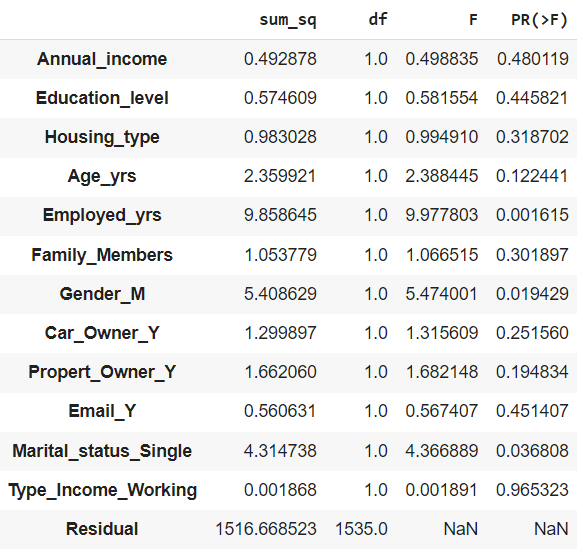

## Machine Learning
We will split the scaled data into training and testing datasets in ratio of 75:25 respectively and build various classification models to predict credit card application approval status: 'approved' or 'rejected' basis different independent variables and check for different metrics - accuracy score, precision, recall.
It may be noted that precision will play a vital role in our case since accurately predicting an actual defaulter (class 1) from  both predicted classes (0,1) will prevent actual losses incurred by the Bank whereas recall will predict actual good client from both classes and failure to predict it will only be an opportunity cost for the Bank.

In [ ]:
# Now we will split the dataset into training and testing sets in 75:25 ratio respectively.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1161, 12)
(1161,)
(387, 12)
(387,)


## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score, recall_score,precision_score # In this classification problem, we have to stress on 'Precision', since a credit line offered to
# a bad client may result in actual losses. Recall will give us how accurately we are able to predict a good client, and failure to do so will be an opportunity cost only, not an actual loss.

print(f' model score on training data ' ,lr.score(x_train, y_train))
print(f' accuracy score ',accuracy_score(y_test, lr_pred))
print(f' precision_score ',precision_score(y_test, lr_pred))
print(f' recall_score ',recall_score(y_test, lr_pred))

 model score on training data  0.8854435831180018
 accuracy score  0.8914728682170543
 precision_score  0.0
 recall_score  0.0


- The model is giving good accuracy score for training as well as testing data. But fails to provide any precision or recall scores. Hence, this model does not suit our case.

## DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
print(dtc.score(x_train, y_train))
print(accuracy_score(y_test, dtc_pred))
print(precision_score(y_test, dtc_pred))
print(recall_score(y_test, dtc_pred))

0.9956933677863911
0.8630490956072352
0.37777777777777777
0.40476190476190477


- The model is an overfit model since it is performing well with training data but accuracy drastically reduces on testing data. Moreover, the precision score obtained is also very low. We will try the model with hyper-parameter tuning and check if metrics are improved.

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 2, 4, 5, 10, 15],
              'min_samples_split': [2, 5, 10, 12, 14],
              'min_samples_leaf': [1, 2, 4, 6, 8]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator= dtc, param_grid=param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(x_train, y_train)
best_dtc_params = grid_search.best_params_
print(best_dtc_params)
best_dtc_model = grid_search.best_estimator_

best_dtc_model.fit(x_train, y_train)
best_dtc_pred = best_dtc_model.predict(x_test)
print(best_dtc_model.score(x_train, y_train))
print(accuracy_score(y_test, best_dtc_pred))
print(precision_score(y_test, best_dtc_pred))
print(recall_score(y_test, best_dtc_pred))

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9026701119724375
0.8863049095607235
0.3333333333333333
0.047619047619047616


- The hyper tuned model has removed the issue of overfitting, but the precision score is very low. Hence, this model cannot be used for our case.

## RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print(rfc.score(x_train, y_train))
print(accuracy_score(y_test, rfc_pred))
print(precision_score(y_test, rfc_pred))
print(recall_score(y_test, rfc_pred))

0.9956933677863911
0.9224806201550387
0.9285714285714286
0.30952380952380953


- The model is performing well for both training and testing data and the precision score too is quite good. Model can be used, but we will try to further tune the model using hyper parameter tuning.

In [ ]:
param_grid_rfc = {'n_estimators': [50,100,200],
              'max_depth': [5,10,15],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2,5,10]}
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid_rfc, cv = 5, scoring = 'accuracy')
grid_search_rfc.fit(x_train,y_train)
best_rfc_params = grid_search_rfc.best_params_
print(best_rfc_params)
best_rfc_model = grid_search_rfc.best_estimator_

best_rfc_model.fit(x_train, y_train)
best_rfc_pred = best_rfc_model.predict(x_test)
print(best_rfc_model.score(x_train, y_train))
print(accuracy_score(y_test, best_rfc_pred))
print(precision_score(y_test, best_rfc_pred))
print(recall_score(y_test, best_rfc_pred))

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.9905254091300603
0.9198966408268734
0.9230769230769231
0.2857142857142857


- This model is comparable in terms of fit, accuracy and precision score. Hence, we may further try to do hyper parameter tuning and proceed with this model if further models do not compare with it.

## KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print(knn.score(x_train, y_train))
print(accuracy_score(y_test, knn_pred))
print(precision_score(y_test, knn_pred))
print(recall_score(y_test, knn_pred))

0.905254091300603
0.8682170542635659
0.23529411764705882
0.09523809523809523


In [ ]:
param_grid_knn = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2] }

grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 3, scoring = 'accuracy')
grid_search_knn.fit(x_train,y_train)
best_knn_params = grid_search_knn.best_params_
print(best_knn_params)
best_knn_model = grid_search_knn.best_estimator_

best_knn_model.fit(x_train, y_train)
best_knn_pred = best_knn_model.predict(x_test)
print(best_knn_model.score(x_train, y_train))
print(accuracy_score(y_test, best_knn_pred))
print(precision_score(y_test, best_knn_pred))
print(recall_score(y_test, best_knn_pred))


{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.9956933677863911
0.9018087855297158
0.6
0.2857142857142857


- The model is showing issue of overfitting and moreover the precision of the model is lower as compared to Random Forest model. Hence, we may not proceed with this model.

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print(xgb.score(x_train, y_train))
print(accuracy_score(y_test, xgb_pred))
print(precision_score(y_test, xgb_pred))
print(recall_score(y_test, xgb_pred))

0.9948320413436692
0.9043927648578811
0.6086956521739131
0.3333333333333333


- The model is performing well in terms of accuracy and precision is not as good as Random Forest model. Hence, we may not proceed with this model.

## SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
svcm = SVC()
svcm.fit(x_train, y_train)
svcm_pred = svcm.predict(x_test)
print(svcm.score(x_train, y_train))
print(accuracy_score(y_test, svcm_pred))
print(precision_score(y_test, svcm_pred))
print(recall_score(y_test, svcm_pred))

0.8854435831180018
0.8914728682170543
0.0
0.0


- The model is not performing well in terms of precision and recall.

#### As per our analysis of models prepared so far, Random Forest Model is performing best as compared to other models. Hence, we will proceed with modelling by considering the significant independent variables so obtained after analysis of ANOVA Test.

In [ ]:
X = df_encoded[['Employed_yrs','Gender_M', 'Marital_status_Single']]
Y = df_encoded['Appln_status']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1161, 3)
(1161,)
(387, 3)
(387,)


In [ ]:
param_grid_rfc_anov = {'n_estimators': [50,100,200],
              'max_depth': [5,10,15],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2,5,10]}
grid_search_rfc_anov = GridSearchCV(estimator = rfc, param_grid = param_grid_rfc_anov, cv = 3, scoring = 'accuracy')
grid_search_rfc_anov.fit(X_train,Y_train)
best_rfc_params_anov = grid_search_rfc_anov.best_params_
print(best_rfc_params_anov)
best_rfc_model_anov = grid_search_rfc_anov.best_estimator_

best_rfc_model_anov.fit(X_train, Y_train)
best_rfc_pred_anov = best_rfc_model_anov.predict(X_test)
print(best_rfc_model_anov.score(X_train, Y_train))
print(accuracy_score(Y_test, best_rfc_pred_anov))
print(precision_score(Y_test, best_rfc_pred_anov))
print(recall_score(Y_test, best_rfc_pred_anov))


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.8888888888888888
0.8785529715762274
0.0
0.0


- We observe that my considering the limited number of variables, our model performance in terms of accuracy is comparable but both precision and recall metrics are null. Hence, we can infer that all the independent variables have some sort of influence on target variable and when taken into consideration, are yielding better results.

# CONCLUSION
All the insights provided hereunder are on the basis of the EDA and data modelling performed and may be co-related with the business.
- The individuals working as commercial associates are having highest of the average income.
- Individuals with secondary and high school education have more applications and approval rates.
- Individuals in working and commercial associate category are more likely to get their applications approved.
- Our client base for credit cards are basically individuals who are employed as commercial staffs and have upto higher education. These strata may be focussed for further business growth.
- Married individuals with family are in majority for approved class.
- The focus group usually resides in house/apartments.
- Property owners are marginally more likely to get approvals.
- Individuals approved generally do not own car.
- Female clients are more inclined towards this business line and are more likely to get approvals.
- Individuals approved in past generally do not have email-ids. May be elder citizens in past with good records of balances and employment who now have become old may not have email-ids as they were not tech savvy. Or it may have not be entered in database for the lack of relevant field earlier. May check with business for exact reasons.
- Annual income does not show any recognisable pattern with Age or with period of employment. Moreover income for both classes does not show any difference and is more or less the same.
- Individuals who have been employed for longer durations are more likely to get applications approved.
- Age of individual is not influencing approval or rejections.


### The Random Forest Classifier model is performing best as compared to other models as the accuracy for both training and testing data is good which means we do not have an issue of overfit in the model. Moreover, the precision metric is also quite good as compared to other models. Hence, the same may be considered for deployment for the business case. The below table shows all the metrics obtained for different models in our analysis.

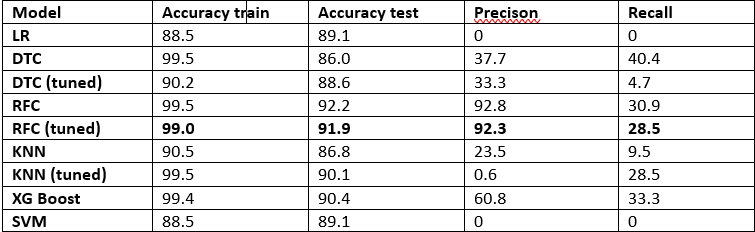